In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
df = pd.read_csv('dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [78]:
df.shape

(1025, 14)

In [79]:
df.info()
# column info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [80]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [81]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

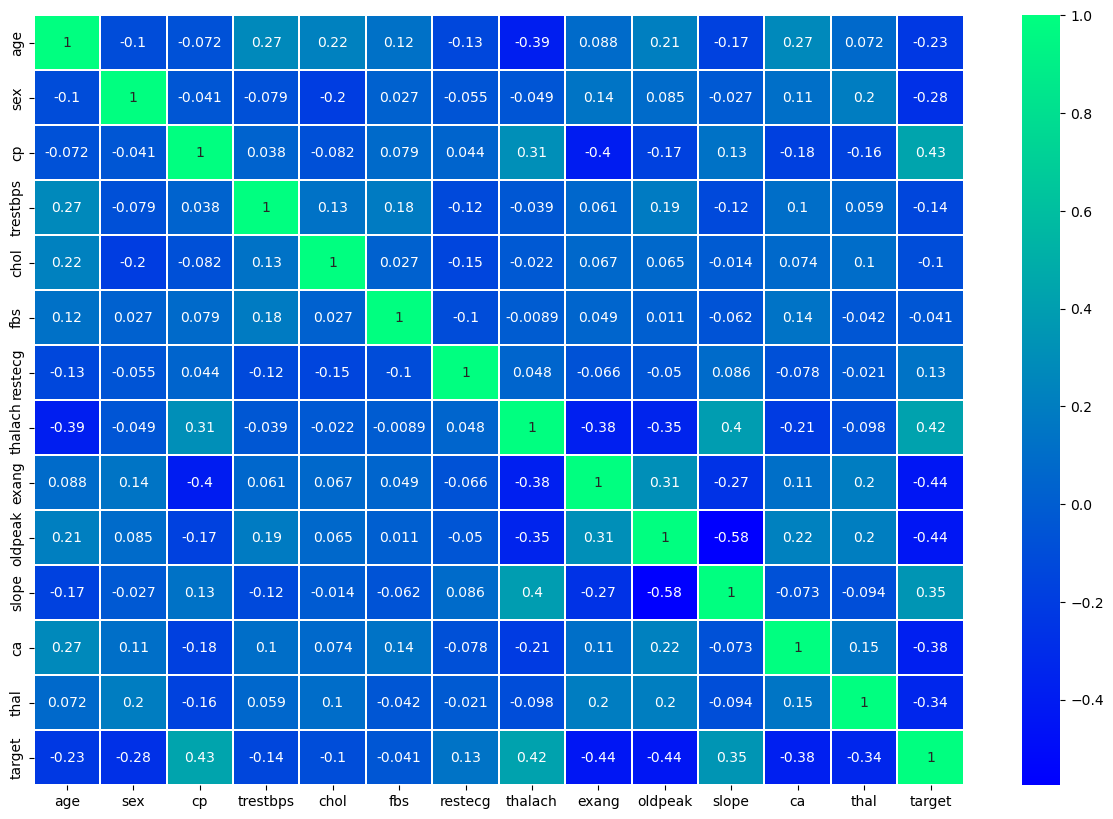

In [82]:
# correlation matrix
# create a heatmap taking correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), linewidths=.01, annot=True, cmap='winter')

# greater value in heatmap in the target row = greater chance in heart disease

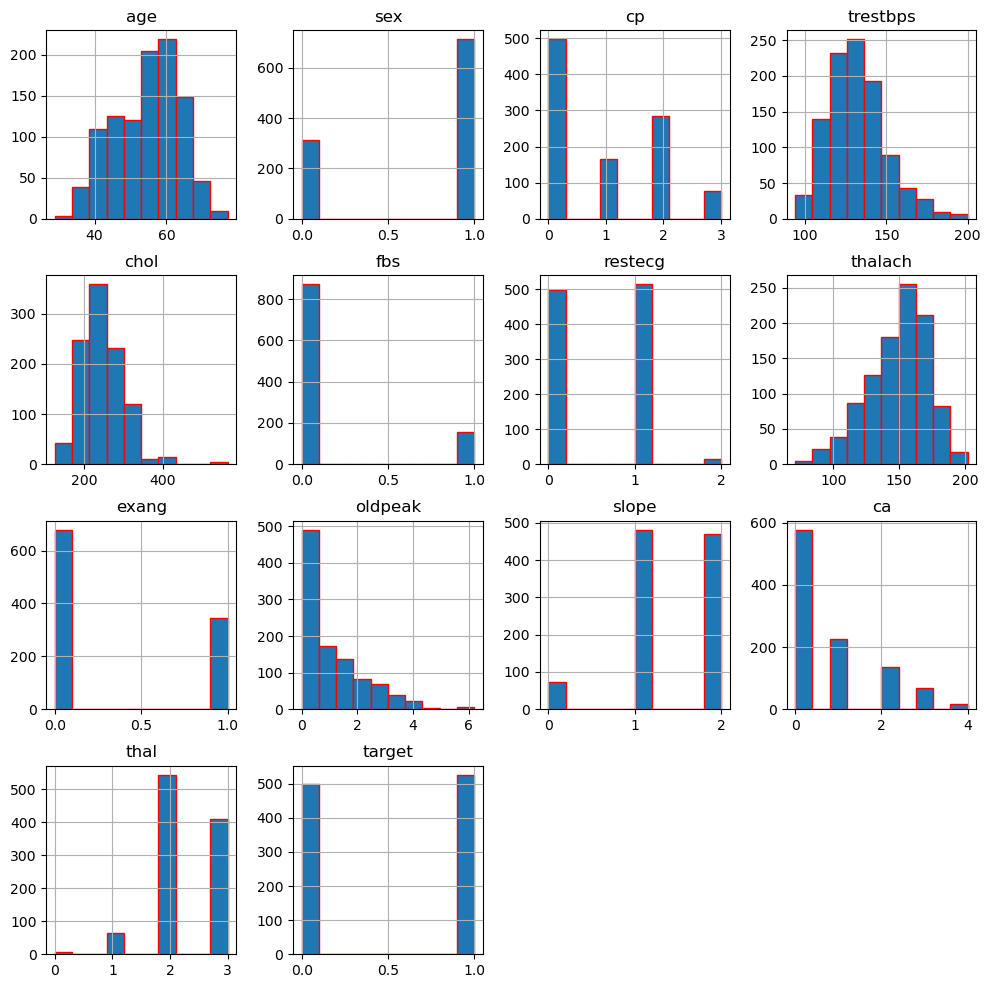

In [83]:
df.hist(figsize=(12, 12), edgecolor='r')
# saves in .png
plt.savefig('featuresplot')

In [84]:

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
# target column = -1 column

In [85]:
# split dataset into train test
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [87]:
Y_test

49      0
525     1
119     1
629     0
186     0
       ..
1014    1
429     0
828     1
99      1
233     1
Name: target, Length: 257, dtype: int64

In [88]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [89]:
clf.fit(X_train, Y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
Y_test_pred = clf.predict(X_test)
Y_test_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [92]:
accuracy = accuracy_score(Y_test, Y_test_pred)
accuracy

0.8093385214007782

In [93]:
cm = confusion_matrix(Y_test, Y_test_pred)
cm

array([[ 91,  39],
       [ 10, 117]], dtype=int64)

In [94]:
# score = diagonal sum / total sum
TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]

In [95]:
print('Accuracy: ', (TP+TN)/(TP + TN + FP + FN))
print('Precision: ', (TP)/(TP+FP))
print('Recall: ', (TP)/(TP+FN))
print('Specificity: ', (TN)/(TN+FP))

Accuracy:  0.8093385214007782
Precision:  0.900990099009901
Recall:  0.7
Specificity:  0.9212598425196851


In [96]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       130
           1       0.75      0.92      0.83       127

    accuracy                           0.81       257
   macro avg       0.83      0.81      0.81       257
weighted avg       0.83      0.81      0.81       257



In [97]:
X_test.head(1).values

array([[ 60. ,   1. ,   0. , 117. , 230. ,   1. ,   1. , 160. ,   1. ,
          1.4,   2. ,   2. ,   3. ]])

In [98]:
input = X_test.iloc[0]
input.shape

(13,)

In [99]:
arr1 = np.asarray(input)
print(arr1)

[ 60.    1.    0.  117.  230.    1.    1.  160.    1.    1.4   2.    2.
   3. ]


In [100]:
arr2 = arr1.reshape(1, -1)
arr2
# arr2 is 2d array

array([[ 60. ,   1. ,   0. , 117. , 230. ,   1. ,   1. , 160. ,   1. ,
          1.4,   2. ,   2. ,   3. ]])

In [101]:
y_pred = clf.predict(arr2)
if(y_pred == 1):
    print('High chances of  having heart disease')
else:
    print('Low chances of  having heart disease')
    

Low chances of  having heart disease


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
